# Ch. 10: Working with Data
Notes on "Data Science from Scratch" by Joel Grus

In [28]:
from __future__ import division

import math
import random
from collections import Counter

import numpy as np
from scipy.stats import invgauss
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', figsize=(10,7)) # default is (8,6)
mpl.rc('xtick',labelsize =14)
mpl.rc('ytick',labelsize =14)
mpl.rc('axes', labelsize = 16)
mpl.rc('axes', titlesize = 18)
mpl.rc('legend', fontsize = 14)

## Exploring Your Data

### One Dimension
- Examples:
    - Daily average number of minutes each user spends on your site
    - Number of times each of a collection of data science tutorial videos was watches
    - Number of pages of each of the data science books in your data science library
- First steps might be:
    - Compute how many data points
    - Compute smallest, largest data points
    - Compute the mean and standard deviation
    - Create a histogram

In [29]:
# Let's define some functions for creating a histogram

def bucketize(point, bucket_size):
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

In [30]:
# Necessary functions defined in Chapter 6

def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """Find approximate inverse using binary search"""
    
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0           # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p   =  10.0, 1           # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2    # consider the midpoint
        mid_p = normal_cdf(mid_z)     # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
            
    return mid_z

Let's create two sets of data with similar means and standard deviations:

In [31]:
random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random()) 
          for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
#normal = [57 * invgauss.cdf(random.random(), 0) for _ in range(10000)]
#help(invgauss)

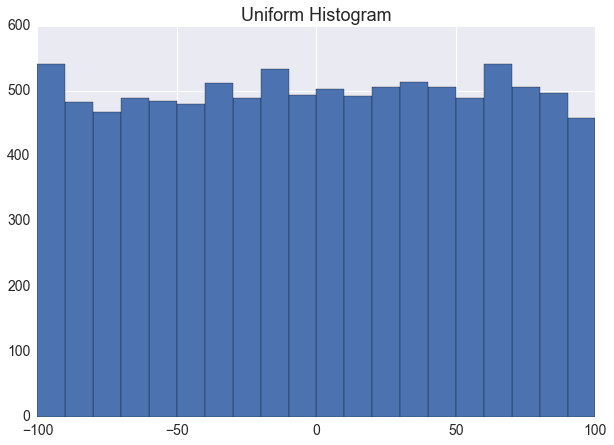

In [32]:
plot_histogram(uniform, 10, "Uniform Histogram")

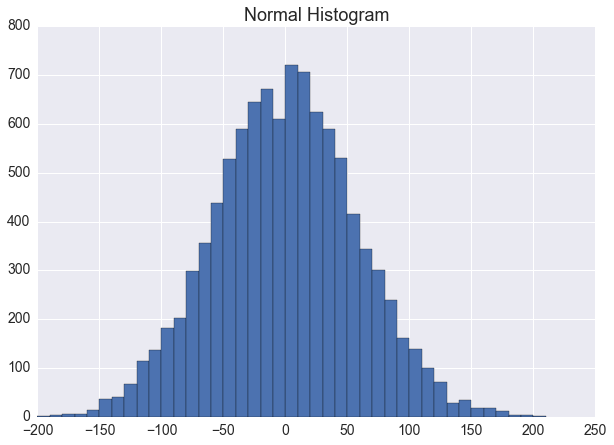

In [33]:
plot_histogram(normal, 10, "Normal Histogram")

- Two Dimensions

In [34]:
def random_normal():
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

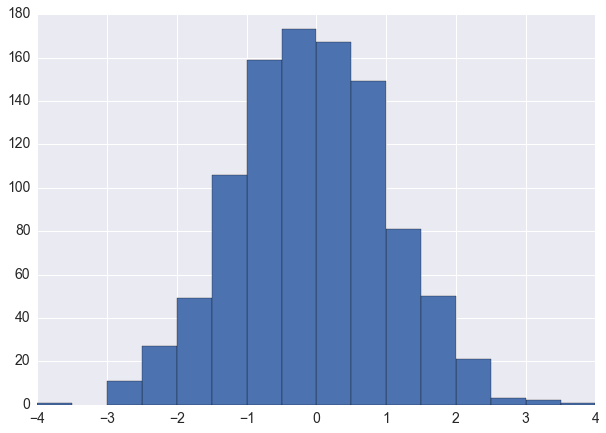

In [43]:
plot_histogram(ys1, 0.5)

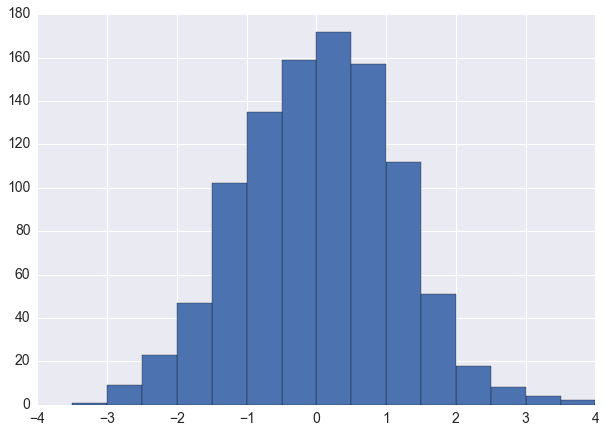

In [44]:
plot_histogram(ys2, 0.5)

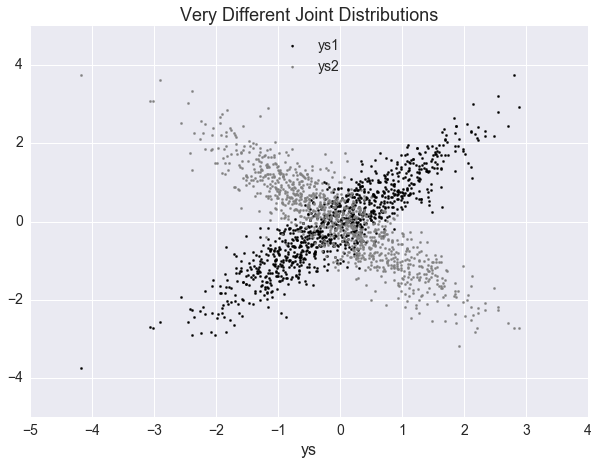

In [47]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.xlabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [ ]:
print correlation(xs, ys1)
print correlation(xs, ys2)


- Many Dimensions

## Cleaning and Munging

In [48]:
def parse_row(input_row, parsers):
    """Given a list of parsers (some of which may be None)
    apply the appropriate one to each element of the input_row"""
    
    return [parser(value) if parser is not None else value
           for value, parser in zip(input_row, parsers)]

def parse_rows_with(reader, parsers):
    """Wrap a reader to apply the parsers to each of its rows"""
    for row in reader:
        yield parse_row(row, parsers)

Use a helper function to deal with bad data:

In [49]:
def try_or_none(f):
    """Wraps f to return None if f raises an exception.
    Assumes f takes only one input."""
    def f_or_none(x):
        try: return f(x)
        except: return None
    return f_or_none

Rewrite `parse_row` to use the helper function:

In [51]:
def parse_row(input_row, parsers):
    return[try_or_non(parser)(value) if parser is not None else value
          for value, parser in zip(input_row, parsers)]

### Example: Stock Prices
- comma-delimited stock prices with bad data

## Manipulating Data

## Rescaling

## Dimensionality Reduction

## For Further Exploration